In [11]:
import ast
import json
import csv
import sys
import os
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

data_path = '../../data'

# Step 1: Read data from the structured JSON files for equal data
with open(f'{data_path}/structured_equal.json', 'r') as f:
    equal_data = json.load(f)  # Load the data from JSON file into a Python list

# Step 2: Read data from the structured JSON files for non-equal data
with open(f'{data_path}/structured_non_equal.json', 'r') as f:
    non_equal_data = json.load(f)

In [15]:
# Plotting histogram
def plot_histogram(ai_data, human_data):
    plt.figure(figsize=(12, 6))
    plt.hist(ai_data, bins=50, alpha=0.5, label='AI Responses')
    plt.hist(human_data, bins=50, alpha=0.5, label='Human Responses')
    plt.title('Distribution of Response Char Lengths')
    plt.xlabel('Length of Responses')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


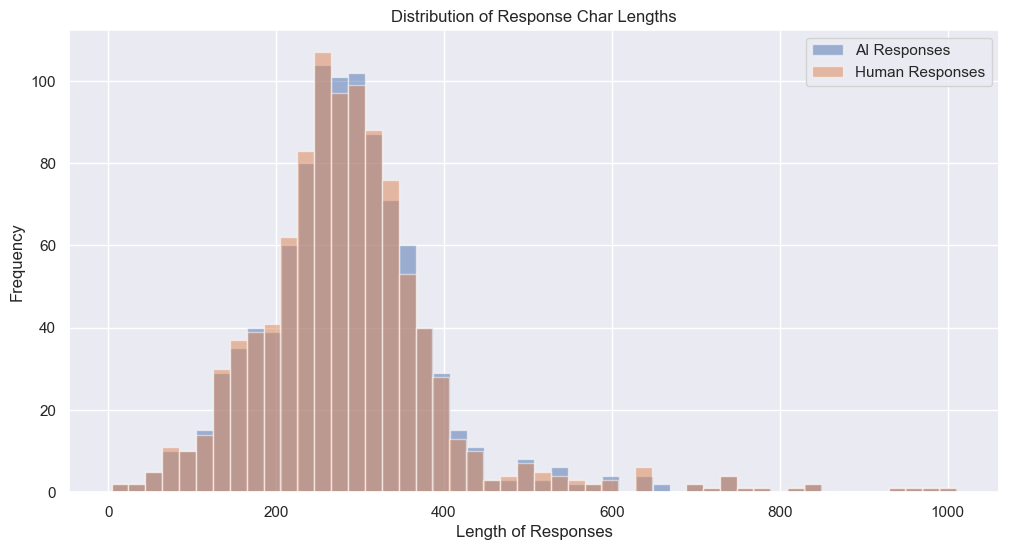

In [16]:
# Plot equals sequence chars distribution
equal_ai_responses = [data['ai_response'] for data in equal_data]
equal_human_responses = [data['human_response'] for data in equal_data]

equal_ai_responses_len = [len(data) for data in equal_ai_responses]
equal_human_responses_len = [len(data) for data in equal_human_responses]

plot_histogram(equal_ai_responses_len, equal_human_responses_len)

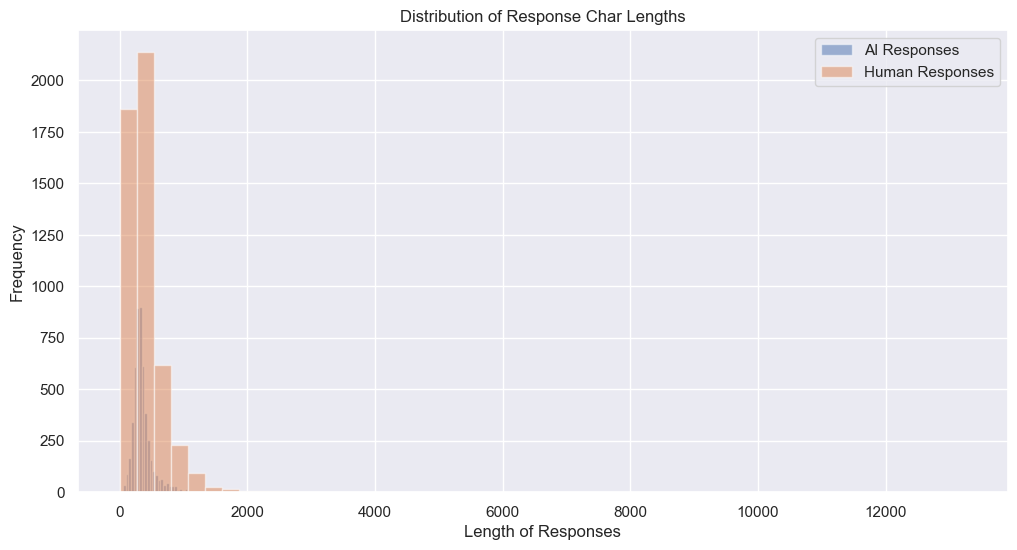

In [17]:
# Plot unequals sequence chars distribution
non_equal_ai_responses = [data['ai_response'] for data in non_equal_data]
non_equal_human_responses = [data['human_response'] for data in non_equal_data]

non_equal_ai_responses_len = [len(data) for data in non_equal_ai_responses]
non_equal_human_responses_len = [len(data) for data in non_equal_human_responses]

plot_histogram(non_equal_ai_responses_len, non_equal_human_responses_len)

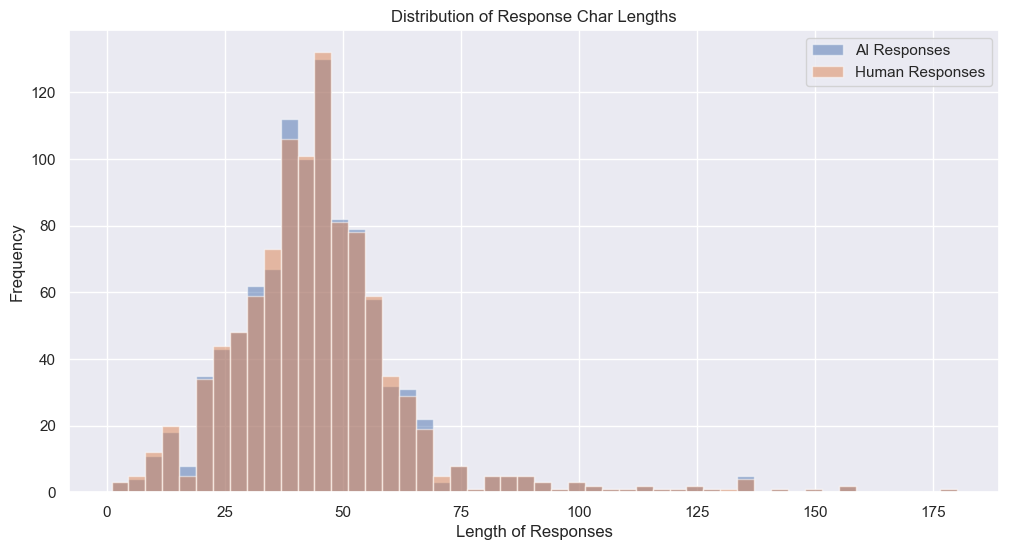

In [18]:
# Plot equals sequence word distribution
equal_ai_responses = [data['ai_response'] for data in equal_data]
equal_human_responses = [data['human_response'] for data in equal_data]

equal_ai_responses_len = [len(data.split(' ')) for data in equal_ai_responses]
equal_human_responses_len = [len(data.split(' ')) for data in equal_human_responses]

plot_histogram(equal_ai_responses_len, equal_human_responses_len)

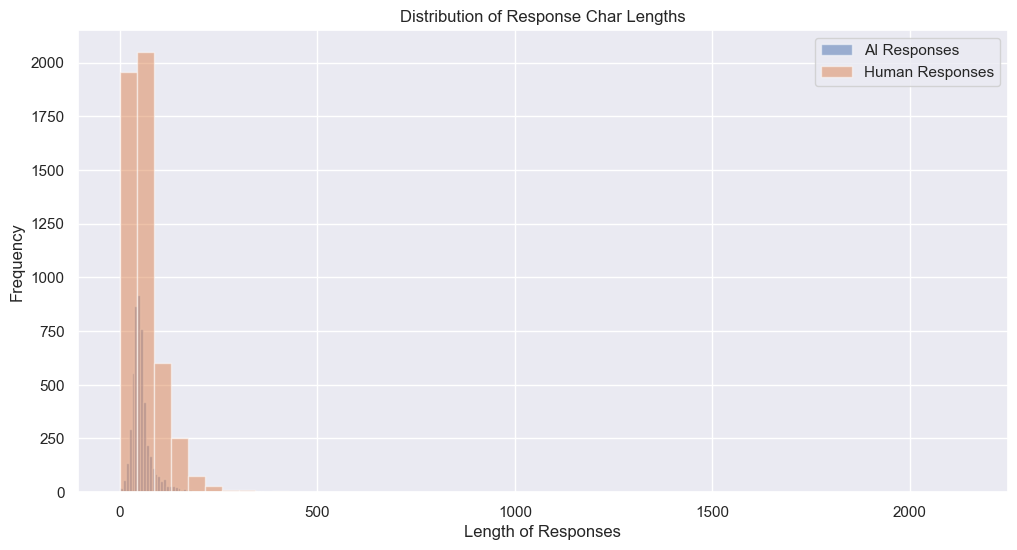

In [19]:
# Plot unequals sequence chars distribution
non_equal_ai_responses = [data['ai_response'] for data in non_equal_data]
non_equal_human_responses = [data['human_response'] for data in non_equal_data]

non_equal_ai_responses_len = [len(data.split(' ')) for data in non_equal_ai_responses]
non_equal_human_responses_len = [len(data.split(' ')) for data in non_equal_human_responses]

plot_histogram(non_equal_ai_responses_len, non_equal_human_responses_len)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

def get_frequent_words(responses):
    # Example using bigrams
    vectorizer = CountVectorizer(ngram_range=(2, 3))
    X = vectorizer.fit_transform(responses)

    # Summing up the occurrences of each bigram and sorting
    bigrams = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))
    sorted_bigrams = sorted(bigrams, key=lambda x: x[1], reverse=True)

    # Display the top 10 bigrams
    for bigram, frequency in sorted_bigrams[:10]:
        print(f"{bigram}: {frequency}")


thank you: 3034
you for: 2742
thank you for: 2731
regards person: 2614
best regards: 2168
your order: 1718
for your: 1661
best regards person: 1614
for the: 1573
person thank: 1530


In [29]:
print('Top 10 most frequent ai n-grams')
get_frequent_words(equal_ai_responses)

Top 10 most frequent ai n-grams
regards person: 618
thank you: 575
you for: 530
thank you for: 529
best regards: 432
best regards person: 373
for your: 330
person thank: 327
person thank you: 327
to hear: 283


In [30]:

print('Top 10 most frequent human n-grams')
get_frequent_words(equal_human_responses)

Top 10 most frequent human n-grams
regards person: 625
thank you: 575
you for: 530
thank you for: 529
best regards: 440
best regards person: 380
for your: 330
person thank: 325
person thank you: 325
to hear: 283


In [31]:
print('Top 10 most frequent ai n-grams')
get_frequent_words(non_equal_ai_responses)

Top 10 most frequent ai n-grams
thank you: 3034
you for: 2742
thank you for: 2731
regards person: 2614
best regards: 2168
your order: 1718
for your: 1661
best regards person: 1614
for the: 1573
person thank: 1530


In [32]:
print('Top 10 most frequent human n-grams')
get_frequent_words(non_equal_human_responses)

Top 10 most frequent human n-grams
thank you: 3226
you for: 2750
thank you for: 2738
if you: 2129
for your: 1703
hi person: 1695
your order: 1685
you have: 1571
person thank: 1510
person thank you: 1510
